In [1]:
A_fake_root = '/Users/ben/Downloads/output/A/fake_samples'
B_fake_root = '/Users/ben/Downloads/output/B/fake_samples'
A_real_root = '/Users/ben/Downloads/output/A/real_samples'
B_real_root = '/Users/ben/Downloads/output/B/real_samples'

In [2]:
import glob
import os
from PIL import Image
import time

In [3]:
A_fake_root_paths = []
A_real_root_paths = []
B_fake_root_paths = []
B_real_root_paths = []

for i in range(35,40):
    A_fake_root_paths += glob.glob(os.path.join(A_fake_root,f'epoch_{i}_**'))
    A_real_root_paths += glob.glob(os.path.join(A_real_root,f'epoch_{i}_**'))
    B_fake_root_paths += glob.glob(os.path.join(B_fake_root,f'epoch_{i}_**'))
    B_real_root_paths += glob.glob(os.path.join(B_real_root,f'epoch_{i}_**'))
A_fake_root_paths[:20]

['/Users/ben/Downloads/output/A/fake_samples/epoch_35_2900.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_1400.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_3000.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_300.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_100.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_3200.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_1600.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_1200.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_500.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_700.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_3400.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_1000.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_0.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_3300.png',
 '/Users/ben/Downloads/output/A/fake_samples/epoch_35_1700.png',
 '/Users/ben/Downloads/output/A/

In [4]:
A_fake_images=[]
for path in A_fake_root_paths:
    A_fake_images.append(Image.open(path))
A_real_images=[]
for path in A_real_root_paths:
    A_real_images.append(Image.open(path))
B_fake_images=[]
for path in B_fake_root_paths:
    B_fake_images.append(Image.open(path))
B_real_images=[]
for path in B_real_root_paths:
    B_real_images.append(Image.open(path))

40


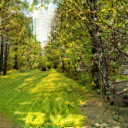

In [5]:
# i = 150
i +=1
print(i)
B_fake_images[i]

In [6]:
#A: [6, 13, 76, 171]
#B: [41, 57, 62, 75, 77]

In [7]:
all_image_list = []
for a, b in list(zip([6, 76, 123, 13], [57, 75, 77, 134])):
    all_image_list.append(B_real_images[a])
    all_image_list.append(A_fake_images[a])
    all_image_list.append(A_real_images[b])
    all_image_list.append(B_fake_images[b])

In [8]:
all_image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD79992970>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD798A8B50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD799133D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD7995A850>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD799B6430>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD798C9610>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD79913A90>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD7995AF10>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD799C7610>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD798DC7F0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD79913B50>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x7FFD7996D070>,
 <PIL.PngImagePl

In [9]:
import math 
numcols = 4
numimages = len(all_image_list) # Ignore name of program and column input
numrows = math.ceil(numimages / numcols) # Number of rows

sampleimage = Image.open('/Users/ben/Downloads/output/A/fake_samples/epoch_35_2900.png') # Open first image, just to get dimensions
width, height = sampleimage.size # PIL uses (x, y)

outimg = Image.new("RGBA", (numcols * width, numrows * height), (0, 0, 0, 0)) # Initialize to transparent

# Write to output image. This approach copies pixels from the source image
for i in range(numimages):
#     currimage = Image.open()
    currimage = all_image_list[i]
    for j in range(width):
        for k in range(height):
            currimgpixel = currimage.getpixel((j, k))
            outimg.putpixel(((i % numcols * width) + j, (i // numcols * height) + k), currimgpixel)

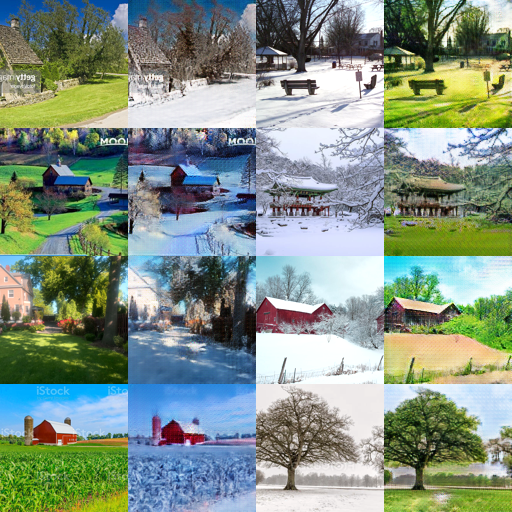

In [10]:
outimg

In [11]:
outimg.save('result.png')